<a href="https://colab.research.google.com/github/aleksandrapelka/MachineLearning/blob/main/Projekt1/Projekt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projekt 1 - Feature engineering + EDA**

> ## **CEL:** Wykonanie pierwszych etapów pipeline'u Machine Learningowego na podstawie danych dotyczących testów dźwignicy.

**Import bibliotek wykorzystanych w projekcie**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## **OKREŚLENIE PROBLEMU BIZNESOWEGO**

Stworzenie kalkulatora mającego na celu przewidywanie dziennych kosztów, poniesionych w wyniku pracy dźwignicy żurawia, w zależności od parametrów technicznych urządzenia, rodzaju zasilania i warunków pogodowych.

Określony problem zostanie rozwiązany w oparciu o uczenie nadzorowane, najprawdopodobniej z wykorzystaniem modelu regresji. Model wykonany na podstawie danych przedstawiających badania dźwignicy umożliwi odbiorcom, m.in. przedsiębiorcom budowlanym, oszacować koszty i wbrać optymalny typ zasilania dźwignicy, przez co w przyszłości będzie można zredukować dzienne koszty poniesione w wyniku pracy urządzenia w różnych warunkach.


## **POZYSKANE DANE**

Dane, które zostały wykorzystane w projekcie, pochodzą ze strony https://dane.gov.pl/. Przedstawiony serwis zapewnia dostęp do otwartych, bezpłatnych danych, które mogą zostać użyte w dowolny sposób, w tym do celów komercyjnych. Dane prezentowane są w różnych kategoriach dotyczących struktury społeczno-ekonomicznej kraju. Istnieje również możliwość wyboru zestawu danych na podstawie dostawcy danych. Udostepnione zasoby można wykorzystać we własnej aplikacji czy serwisie internetowym, mając na uwadze warunki wykorzystania danych, jednakże w wielu przypadkach nie ma ograniczeń lub nie są wymagane dodatkowe formalności. Zbiory danych można pozyskać poprzez API, stronę internetową dostawcy lub plik w formacie csv czy xlsx. Standard API jest oparty o standard REST i referencyjnie wykorzystuje format reprezentacji danych zdefiniowany przez standard JSON. Ponadto serwis zapewnia możliwość wstępnego sprawdzenia jakości danych i ich wizualizacji jeszcze przed pobraniem zestawu.  

**Wczytanie zestawu danych**

In [ ]:
data = pd.read_csv('dane_z_badan_dzwignicy.csv')

Pobrany zbiór danych, o wysokim poziomie otwartości, dotyczy testów dźwignicy żurawia, przeprowadzonych podczas pionowego transportu ładunków, w różnych warunkach pogodowych, dla poszczególnych parametrów technicznych. Dane zostały zaimportowane z pliku .csv, są przedstawione w postaci tabelarycznej, co określa ich typ jako dane uporządkowane. Brak informacji o częstości aktualizacji danych uniemożliwia stworzenie dokładnego planu automatyzacji rozwiązania lub określenia czy automatyzacja w tym wypadku jest w ogóle konieczna. W związku z tym zestaw danych może być przechowywany lokalnie lub na dysku Google.

## **ANALIZA I PRZYGOTOWANIE DANYCH**

Poniżej zostały zaprezentowane kroki (EDA + FE), które umożliwiły dokonać analizy zaimportowanego zbioru danych oraz zmodyfikować i przygotować zestaw danych do stworzenia modelu.

### **Analiza wstępna**

**Sprawdzenie wielkości zbioru danych**

In [ ]:
print('Liczba wszystkich obserwacji: {}'.format(len(data)))

Liczba wszystkich obserwacji: 948


**Wyświetlenie kolejno pierwszych i ostatnich 10 wierszy**

In [ ]:
data.head(10)

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
0,1,11/4/2019,5,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.00
1,2,11/4/2019,8,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.00
2,3,11/4/2019,15,13.2,2,8,15.0,48.0,NaN,NaN,NaN,NaN,NaN,10.25,2.85,10.25,995.00
3,4,11/5/2019,5,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.50
4,5,11/5/2019,8,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.50
5,6,11/5/2019,15,13.2,1,10,14.9,47.2,4241.0,NaN,NaN,NaN,200.1752,7.00,1.94,8.00,999.50
6,7,11/6/2019,5,17.7,3,9,15.1,48.0,4244.0,NaN,NaN,NaN,203.7120,13.66,3.79,6.75,1004.25
7,8,11/6/2019,8,17.7,3,9,15.1,48.0,4244.0,NaN,NaN,NaN,203.7120,13.66,3.79,6.75,1004.25
8,9,11/6/2019,15,17.7,3,9,15.1,48.0,4244.0,NaN,NaN,NaN,203.7120,13.66,3.79,6.75,1004.25
9,10,11/7/2019,5,17.7,8,11,15.2,48.8,4245.0,NaN,NaN,NaN,207.1560,6.50,1.81,6.00,1008.50


In [ ]:
data.tail(10)

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa]
938,939,2/25/2023,40,17.7,15,8,NaN,NaN,NaN,39.6,79.2,0.4843,38.35656,32.0,8.89,4.0,996.0
939,940,2/26/2023,15,22.2,20,4,NaN,NaN,NaN,39.8,79.2,0.4843,38.35656,15.0,4.17,0.0,1014.0
940,941,2/26/2023,25,22.2,20,4,NaN,NaN,NaN,39.8,79.2,0.4843,38.35656,15.0,4.17,0.0,1014.0
941,942,2/26/2023,40,22.2,20,4,NaN,NaN,NaN,39.8,79.2,0.4843,38.35656,15.0,4.17,0.0,1014.0
942,943,2/27/2023,15,22.2,19,10,NaN,NaN,NaN,39.6,79.2,0.4843,38.35656,13.0,3.61,1.0,1026.0
943,944,2/27/2023,25,22.2,19,10,NaN,NaN,NaN,39.6,79.2,0.4843,38.35656,13.0,3.61,1.0,1026.0
944,945,2/27/2023,40,22.2,19,10,NaN,NaN,NaN,39.6,79.2,0.4843,38.35656,13.0,3.61,1.0,1026.0
945,946,2/28/2023,15,26.7,26,4,NaN,NaN,NaN,40.0,80.1,0.4843,38.79243,12.0,3.33,0.0,1030.0
946,947,2/28/2023,25,26.7,26,4,NaN,NaN,NaN,40.0,80.1,0.4843,38.79243,12.0,3.33,0.0,1030.0
947,948,2/28/2023,40,26.7,26,4,NaN,NaN,NaN,40.0,80.1,0.4843,38.79243,12.0,3.33,0.0,1030.0


**Wyświetlenie podstawowych informacji, określenie typu poszczególnych zmiennych**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Nr. Pomiaru                                             948 non-null    int64  
 1   Data                                                    948 non-null    object 
 2   Ciężar ładunku [T]                                      948 non-null    int64  
 3   Długość wysięgnika [m]                                  948 non-null    float64
 4   Odległość od osi [m]                                    948 non-null    int64  
 5   Wysokość podnoszenia [m]                                948 non-null    int64  
 6   Maksymalne, chwilowe zużycie ON [l/h]                   117 non-null    float64
 7   Dzienne zużycie ON [l/8h]                               117 non-null    float64
 8   Cena hurtowa ON 1000l [PLN]             

**Sprawdzenie liczby pomiarów wykonanych w każdym dniu**

In [ ]:
data.groupby('Data').count().groupby('Ciężar ładunku [T]').size()

Ciężar ładunku [T]
3    316
dtype: int64

Wykonanie powyższych operacji pozwoliło stwierdzić, że zbiór danych to szereg czasowy, który liczy 948 obserwacji i składa się z 17 zmiennych. W każdym dniu, w którym przeprowadzono testy, dokonano 3 pomiarów wykorzystując ładunki o różnym ciężarze. Już po wyświetleniu kilku pierwszych i ostatnich rekordów można również zaobserwować, że w zbiorze wystepuje wiele brakujących wartości, w szczególności w przypadku zmiennych związanych ze zużyciem oraz ceną zarówno paliwa jak i energii elektrycznej. Ponadto można wyróżnić kilka typów zaprezentowanych zmiennych, przy czym większość z nich to dane typu numerycznego (float i int).

### **Liczebność cech**

**Sprawdzenie liczebności etykiet dla poszczególnych zmiennych**

In [ ]:
var_names = list(data.columns)
for var_name in var_names:
    print('Liczba etykiet zmiennej {}: {}'.format(var_name, len(data[var_name].unique())))

Liczba etykiet zmiennej Nr. Pomiaru: 948
Liczba etykiet zmiennej Data: 316
Liczba etykiet zmiennej Ciężar ładunku [T]: 8
Liczba etykiet zmiennej Długość wysięgnika [m]: 14
Liczba etykiet zmiennej Odległość od osi [m]: 52
Liczba etykiet zmiennej Wysokość podnoszenia [m]: 42
Liczba etykiet zmiennej Maksymalne, chwilowe zużycie ON [l/h]: 6
Liczba etykiet zmiennej Dzienne zużycie ON [l/8h]: 6
Liczba etykiet zmiennej Cena hurtowa ON 1000l [PLN]: 28
Liczba etykiet zmiennej Maksymalne, chwilowe zużycie energii elektrycznej [kW]: 6
Liczba etykiet zmiennej Dzienne zużycie energii elektrycznej [kW/8h]: 4
Liczba etykiet zmiennej Cena energii elektrycznej [kWh]: 2
Liczba etykiet zmiennej Koszt dzienny [PLN]: 33
Liczba etykiet zmiennej Prędkość wiatru [km/h]: 109
Liczba etykiet zmiennej Prędkość wiatru [m/s]: 109
Liczba etykiet zmiennej Temperatura [C]: 63
Liczba etykiet zmiennej Ciśnienie [hPa]: 108


Określenie kardynalności dla poszczególnych zmiennych pozwoliło zauważyć, że najwięcej etykiet występuje w przypadku zmiennej *Nr. Pomiaru*, do której zapisano id kolejnych pomiarów. Znaczną liczebnością cech odznacza się także zmienna *Data* oraz zmienne określające warunki pogodowe. Najmniej etykiet zaobserwowano natomiast dla zmiennej *Cena energii elektrycznej [kWh]* i *Dzienne zużycie energii elektrycznej [kW/8h]*.

**Wyświetlenie etykiet dla zmiennej docelowej (target)**

In [ ]:
print('Tablica unikalnych etykiet dla zmiennej Koszt dzienny [PLN]:\n {}'.format
      (np.unique(data['Koszt dzienny [PLN]'])))

Tablica unikalnych etykiet dla zmiennej Koszt dzienny [PLN]:
 [ 38.35656  38.744    38.79243 200.1752  201.4968  201.6384  201.7936
 202.2992  202.724   203.664   203.712   203.9984  204.192   204.2816
 204.376   204.864   205.632   206.256   206.496   206.784   206.88
 207.156   207.36    207.5952  208.32    209.5472  209.9928  210.096
 210.816   211.0112  214.6224  219.2816        nan]


**Wygenerowanie wykresu liniowego dla zmiennej** ***Koszt dzienny [PLN]***

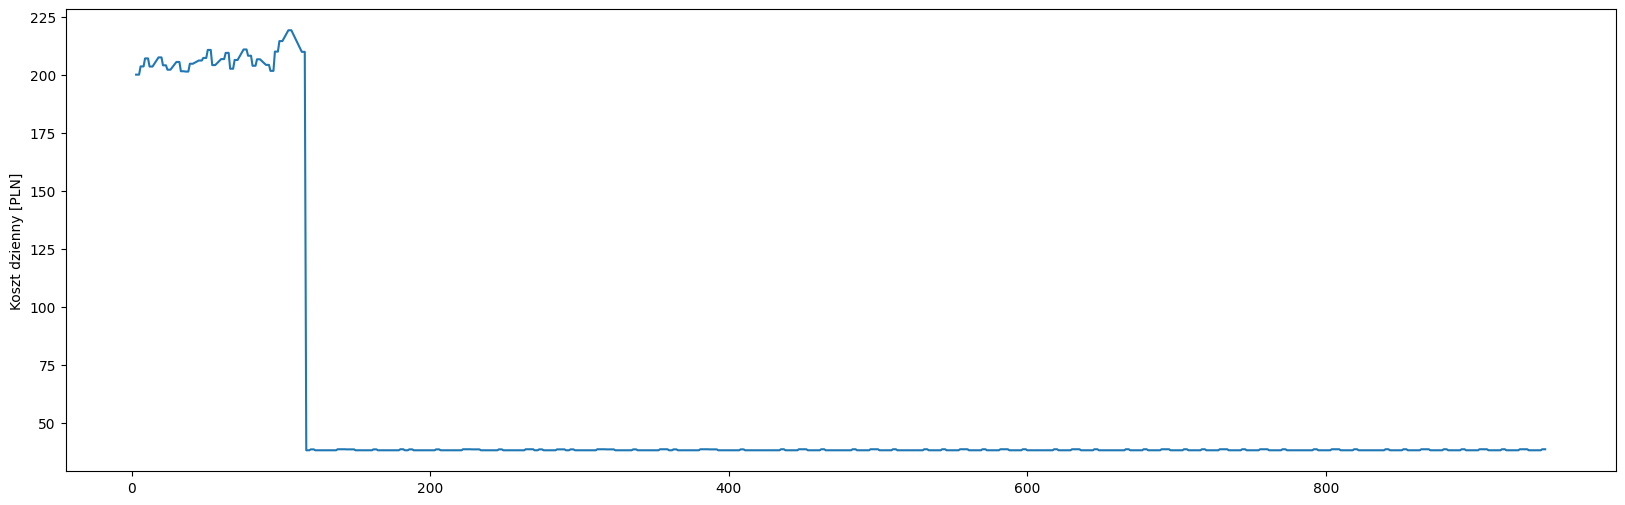

In [ ]:
f, ax = plt.subplots(figsize=(20, 6))
ax = sns.lineplot(data=data['Koszt dzienny [PLN]'])
plt.show()

Unikalne etykiety zmiennej *Koszt dzienny [PLN]* są bardzo zróżnicowane - część z nich przyjmuje wartość ok. 38 zł, a część waha się w granicach od 200 do 220 zł. Można zaobserwować wyraźny podział przedstawionej zmiennej na 2 grupy, związane z odmiennymi metodami zasilania układu, co najlepiej obrazuje przedstawiony wykres liniowy - pierwsza część dotyczy kosztów poniesionych w wyniku zasilania układu paliwem, druga - energią elektryczną.

**Redukcja kardynalności dla zmiennej docelowej**

In [ ]:
len(np.unique(round(data['Koszt dzienny [PLN]'], 0))) 
np.unique(round(data['Koszt dzienny [PLN]'], 0))
data['Koszt dzienny [PLN] redukcja'] = round(data['Koszt dzienny [PLN]'], 0)

print('Kardynalność zbioru zmiennej opisującej koszt dzienny zredukowano o: {}%'.format(
    round(100-(len(data['Koszt dzienny [PLN] redukcja'].unique())/len(data['Koszt dzienny [PLN]'].unique())*100), 2)))

Kardynalność zbioru zmiennej opisującej koszt dzienny zredukowano o: 51.52%


**Redukcja unikalnych etykiet w obrębie zmiennych kategorycznych**

In [ ]:
data['Ciężar ładunku [T] - kategorie'] = pd.cut(
    x=data['Ciężar ładunku [T]'], bins=4, 
    labels=['bardzo lekki', 'lekki', 'umiarkowanie ciężki', 'bardzo ciężki'])
data['Długość wysięgnika [m] - kategorie'] = pd.cut(
    x=data['Długość wysięgnika [m]'], bins=7, 
    labels=['bardzo krótki', 'krótki', 'umiarkowanie krótki', 'umiarkowany', 'umiarkowanie długi', 'długi', 'bardzo długi'])
data['Odległość od osi [m] - kategorie'] = pd.cut(
    x=data['Odległość od osi [m]'], bins=7, 
    labels=['bardzo mała', 'mała', 'umiarkowanie mała', 'umiarkowana', 'umiarkowanie duża', 'duża', 'bardzo duża'])
data['Wysokość podnoszenia [m] - kategorie'] = pd.cut(
    x=data['Wysokość podnoszenia [m]'], bins=7, 
    labels=['bardzo mała', 'mała', 'umiarkowanie mała', 'umiarkowana', 'umiarkowanie duża', 'duża', 'bardzo duża'])

In [ ]:
print('Kardynalność zbioru zmiennej opisującej ciężar ładunku zredukowano o: {}%'.format(round(
    100-(len(data['Ciężar ładunku [T] - kategorie'].unique())/len(data['Ciężar ładunku [T]'].unique())*100), 2)))
print('Kardynalność zbioru zmiennej opisującej długość wysięgnika zredukowano o: {}%'.format(round(
    100-(len(data['Długość wysięgnika [m] - kategorie'].unique())/len(data['Długość wysięgnika [m]'].unique())*100), 2)))
print('Kardynalność zbioru zmiennej opisującej odległość od osi zredukowano o: {}%'.format(round(
    100-(len(data['Odległość od osi [m] - kategorie'].unique())/len(data['Odległość od osi [m]'].unique())*100), 2)))
print('Kardynalność zbioru zmiennej opisującej wysokość podnoszenia zredukowano o: {}%'.format(round(
    100-(len(data['Wysokość podnoszenia [m] - kategorie'].unique())/len(data['Wysokość podnoszenia [m]'].unique())*100), 2)))

Kardynalność zbioru zmiennej opisującej ciężar ładunku zredukowano o: 50.0%
Kardynalność zbioru zmiennej opisującej długość wysięgnika zredukowano o: 50.0%
Kardynalność zbioru zmiennej opisującej odległość od osi zredukowano o: 86.54%
Kardynalność zbioru zmiennej opisującej wysokość podnoszenia zredukowano o: 83.33%


Zredukowano kardynalność w przypadku zmiennej opisującej koszt dzienny poprzez zaokrąglenie wartości do liczby całkowitej w celu uproszczenia predykcji. Liczebność unikalnych etykiet zredukowano o ok. 50%. Liczebność cech zredukowano także w przypadku zmiennych kategorycznych poprzez utworzenie kilku etykiet opisowych i zaklasyfikowania wartości do odpowiednich przedziałów.

**Zmiana typu danych**

In [ ]:
data['Data'] = pd.to_datetime(data['Data'])

var_names = list(data.columns[2:6])
for var in var_names:
    data[var] = data[var].astype('float64')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Nr. Pomiaru                                             948 non-null    int64         
 1   Data                                                    948 non-null    datetime64[ns]
 2   Ciężar ładunku [T]                                      948 non-null    float64       
 3   Długość wysięgnika [m]                                  948 non-null    float64       
 4   Odległość od osi [m]                                    948 non-null    float64       
 5   Wysokość podnoszenia [m]                                948 non-null    float64       
 6   Maksymalne, chwilowe zużycie ON [l/h]                   117 non-null    float64       
 7   Dzienne zużycie ON [l/8h]                               117 no

Ujednolicono typ poprzez zamianę na float w przypadku niektórych zmiennych oraz zmieniono typ z object na datetime w przypadku zmiennej *Date* w celu jej rozdzielenia na 3 osobne zmienne w dalszym etapie FE.

**Wyświetlenie podstawowych statystyk opisowych dla zmiennych typu numerycznego**

In [ ]:
data.describe()

,Nr. Pomiaru,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],Koszt dzienny [PLN] redukcja
count,948.000000,948.000000,948.000000,948.000000,948.000000,117.000000,117.000000,87.000000,831.000000,831.000000,8.310000e+02,918.000000,948.000000,948.000000,948.000000,948.000000,918.000000
mean,474.500000,7.959916,43.712342,22.782700,25.433544,14.997436,47.958974,4308.413793,39.759928,79.455957,4.843000e-01,54.399234,16.169810,4.491962,7.791139,1017.610759,54.228758
std,273.808327,7.310180,18.857567,18.205887,16.728745,0.114817,0.749040,52.312467,0.157754,0.399077,5.554458e-17,49.241657,7.968049,2.213261,7.714173,9.615894,49.297883
min,1.000000,1.000000,13.200000,1.000000,3.000000,14.800000,46.400000,4241.000000,39.600000,79.200000,4.843000e-01,38.356560,3.250000,0.900000,-8.000000,991.000000,38.000000
25%,237.750000,5.000000,26.700000,8.000000,10.000000,14.900000,47.200000,4269.000000,39.600000,79.200000,4.843000e-01,38.356560,10.250000,2.850000,2.000000,1011.875000,38.000000
50%,474.500000,5.000000,44.800000,19.000000,22.000000,15.000000,48.000000,4302.000000,39.800000,79.200000,4.843000e-01,38.356560,14.000000,3.890000,6.500000,1018.000000,38.000000
75%,711.250000,8.000000,62.800000,33.000000,38.000000,15.100000,48.800000,4328.000000,39.900000,80.000000,4.843000e-01,38.792430,19.812500,5.507500,14.000000,1023.812500,39.000000
max,948.000000,40.000000,72.000000,71.000000,67.000000,15.200000,49.600000,4449.000000,40.000000,80.100000,4.843000e-01,219.281600,46.250000,12.850000,28.000000,1045.000000,219.000000


**Wyświetlenie podstawowych statystyk opisowych dla zmiennych kategorialnych**

In [ ]:
data.describe(include=['category'])

,Ciężar ładunku [T] - kategorie,Długość wysięgnika [m] - kategorie,Odległość od osi [m] - kategorie,Wysokość podnoszenia [m] - kategorie
count,948,948,948,948
unique,4,7,7,7
top,bardzo lekki,bardzo długi,bardzo mała,bardzo mała
freq,730,168,330,312


Zaprezentowano podstawowe statystyki opisowe zarówno w przypadku zmiennych typu numerycznego jak i kategorycznego, które zapewniły szerszy pogląd na zestaw danych. Na ich podstawie można stwierdzić, że np. większość testów wykonano dla bardzo lekkich ładunków, przy bardzo małej odległości od osi i wysokości podnoszenia, za to dla bardzo dużej długości wysięgnika oraz w zróżnicowanych warunkach pogodowych.   

### **Braki danych**

**Sprawdzenie występowania brakujących wartości (liczby i odsetku)**

In [ ]:
pd.isnull(data).sum()

Nr. Pomiaru                                                 0
Data                                                        0
Ciężar ładunku [T]                                          0
Długość wysięgnika [m]                                      0
Odległość od osi [m]                                        0
Wysokość podnoszenia [m]                                    0
Maksymalne, chwilowe zużycie ON [l/h]                     831
Dzienne zużycie ON [l/8h]                                 831
Cena hurtowa ON 1000l [PLN]                               861
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    117
Dzienne zużycie energii elektrycznej [kW/8h]              117
Cena energii elektrycznej [kWh]                           117
Koszt dzienny [PLN]                                        30
Prędkość wiatru [km/h]                                      0
Prędkość wiatru [m/s]                                       0
Temperatura [C]                                             0
Ciśnieni

In [ ]:
pd.isnull(data).mean()

Nr. Pomiaru                                               0.000000
Data                                                      0.000000
Ciężar ładunku [T]                                        0.000000
Długość wysięgnika [m]                                    0.000000
Odległość od osi [m]                                      0.000000
Wysokość podnoszenia [m]                                  0.000000
Maksymalne, chwilowe zużycie ON [l/h]                     0.876582
Dzienne zużycie ON [l/8h]                                 0.876582
Cena hurtowa ON 1000l [PLN]                               0.908228
Maksymalne, chwilowe zużycie energii elektrycznej [kW]    0.123418
Dzienne zużycie energii elektrycznej [kW/8h]              0.123418
Cena energii elektrycznej [kWh]                           0.123418
Koszt dzienny [PLN]                                       0.031646
Prędkość wiatru [km/h]                                    0.000000
Prędkość wiatru [m/s]                                     0.00

**Wyświetlenie pierwszych 15 rekordów z brakującymi danymi dla zmiennej** ***Koszt dzienny [PLN]***

In [ ]:
data[pd.isnull(data['Koszt dzienny [PLN]'])].head(15)

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",...,Koszt dzienny [PLN],Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],Koszt dzienny [PLN] redukcja,Ciężar ładunku [T] - kategorie,Długość wysięgnika [m] - kategorie,Odległość od osi [m] - kategorie,Wysokość podnoszenia [m] - kategorie
0,1,2019-11-04,5.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,NaN,10.25,2.85,10.25,995.00,NaN,bardzo lekki,bardzo krótki,bardzo mała,bardzo mała
1,2,2019-11-04,8.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,NaN,10.25,2.85,10.25,995.00,NaN,bardzo lekki,bardzo krótki,bardzo mała,bardzo mała
2,3,2019-11-04,15.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,NaN,10.25,2.85,10.25,995.00,NaN,lekki,bardzo krótki,bardzo mała,bardzo mała
15,16,2019-11-12,5.0,22.2,9.0,12.0,14.9,47.2,NaN,NaN,...,NaN,10.50,2.92,7.75,1005.00,NaN,bardzo lekki,krótki,bardzo mała,bardzo mała
16,17,2019-11-12,8.0,22.2,9.0,12.0,14.9,47.2,NaN,NaN,...,NaN,10.50,2.92,7.75,1005.00,NaN,bardzo lekki,krótki,bardzo mała,bardzo mała
17,18,2019-11-12,15.0,22.2,9.0,12.0,14.9,47.2,NaN,NaN,...,NaN,10.50,2.92,7.75,1005.00,NaN,lekki,krótki,bardzo mała,bardzo mała
27,28,2019-11-18,5.0,31.3,2.0,24.0,15.1,48.8,NaN,NaN,...,NaN,12.00,3.33,8.00,1013.75,NaN,bardzo lekki,umiarkowanie krótki,bardzo mała,umiarkowanie mała
28,29,2019-11-18,8.0,31.3,2.0,24.0,15.1,48.8,NaN,NaN,...,NaN,12.00,3.33,8.00,1013.75,NaN,bardzo lekki,umiarkowanie krótki,bardzo mała,umiarkowanie mała
29,30,2019-11-18,15.0,31.3,2.0,24.0,15.1,48.8,NaN,NaN,...,NaN,12.00,3.33,8.00,1013.75,NaN,lekki,umiarkowanie krótki,bardzo mała,umiarkowanie mała
42,43,2019-11-25,5.0,40.3,3.0,18.0,15.1,48.8,NaN,NaN,...,NaN,11.00,3.06,2.50,1013.75,NaN,bardzo lekki,umiarkowany,bardzo mała,mała


Stwierdzono występowanie brakujących danych w przypadku 7 zmiennych (zestaw podstawowy). Braki danych, które wystąpiły w analizowanym zbiorze danych mają charakter nieprzypadkowy (MNAR) i są związane z wyborem układu zasilania - w przypadku, gdy dźwignica była zasilana paliwem, nie była zasilana energią elektryczną i odwrotnie. Na tej podstawie można zauważyć, że zdecydowana większość testów (ok. 88%) została przeprowadzona dla układu zasilania elektrycznego. Brakujące wartości wystąpiły także w przypadku zmiennej *Koszt dzienny [PLN]*, co było spowodowane brakiem informacji o cenie hurtowej Diesla w tych dniach. Występowanie braków danych w obrębie wspomnianych zmiennych również mogło nie być przypadkiem, gdyż wartości NaN zostały wpisane dla około co 15 pomiaru. Omawiane zjawisko mogło być związane z próbą uzupełnienia zbiornika paliwem w innej cenie (mieszanka starego + nowego), aby wykonać ostatni pomiar przed całkowitym wypełnieniem układu nową dostawą paliwa lub wymianą pustego zbiornika na pełny zbiornik i brakiem uśredniania różnych cen paliwa w przypadku testów wykonanych w tym dniu.  

### **Ekstrakcja cech**

**Utworzenie nowej kategorii określającej rodzaj zasilania układu**

In [ ]:
data['Zasilanie energią elektryczną'] = pd.DataFrame(
    [0 if elem else 1 for elem in data['Dzienne zużycie energii elektrycznej [kW/8h]'].isnull()])
data

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",...,Prędkość wiatru [km/h],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],Koszt dzienny [PLN] redukcja,Ciężar ładunku [T] - kategorie,Długość wysięgnika [m] - kategorie,Odległość od osi [m] - kategorie,Wysokość podnoszenia [m] - kategorie,Zasilanie energią elektryczną
0,1,2019-11-04,5.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,10.25,2.85,10.25,995.0,NaN,bardzo lekki,bardzo krótki,bardzo mała,bardzo mała,0
1,2,2019-11-04,8.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,10.25,2.85,10.25,995.0,NaN,bardzo lekki,bardzo krótki,bardzo mała,bardzo mała,0
2,3,2019-11-04,15.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,10.25,2.85,10.25,995.0,NaN,lekki,bardzo krótki,bardzo mała,bardzo mała,0
3,4,2019-11-05,5.0,13.2,1.0,10.0,14.9,47.2,4241.0,NaN,...,7.00,1.94,8.00,999.5,200.0,bardzo lekki,bardzo krótki,bardzo mała,bardzo mała,0
4,5,2019-11-05,8.0,13.2,1.0,10.0,14.9,47.2,4241.0,NaN,...,7.00,1.94,8.00,999.5,200.0,bardzo lekki,bardzo krótki,bardzo mała,bardzo mała,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,944,2023-02-27,25.0,22.2,19.0,10.0,NaN,NaN,NaN,39.6,...,13.00,3.61,1.00,1026.0,38.0,umiarkowanie ciężki,krótki,mała,bardzo mała,1
944,945,2023-02-27,40.0,22.2,19.0,10.0,NaN,NaN,NaN,39.6,...,13.00,3.61,1.00,1026.0,38.0,bardzo ciężki,krótki,mała,bardzo mała,1
945,946,2023-02-28,15.0,26.7,26.0,4.0,NaN,NaN,NaN,40.0,...,12.00,3.33,0.00,1030.0,39.0,lekki,krótki,umiarkowanie mała,bardzo mała,1
946,947,2023-02-28,25.0,26.7,26.0,4.0,NaN,NaN,NaN,40.0,...,12.00,3.33,0.00,1030.0,39.0,umiarkowanie ciężki,krótki,umiarkowanie mała,bardzo mała,1


Braki danych w omawianym przypadku okazały się istotne z punktu widzenia dalszej analizy, w związku z czym utowrzono nową kategorię określającą rodzaj zasilania o nazwie *Zasilanie energią elektryczną*, gdzie wartość 1 oznacza zasilanie układu energią elektryczną, wartość 0 - paliwem.

**Utworzenie zmiennych binarnych dla zmiennych kategorycznych**

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data

,Nr. Pomiaru,Data,Ciężar ładunku [T],Długość wysięgnika [m],Odległość od osi [m],Wysokość podnoszenia [m],"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",...,Odległość od osi [m] - kategorie_umiarkowana,Odległość od osi [m] - kategorie_umiarkowanie duża,Odległość od osi [m] - kategorie_duża,Odległość od osi [m] - kategorie_bardzo duża,Wysokość podnoszenia [m] - kategorie_mała,Wysokość podnoszenia [m] - kategorie_umiarkowanie mała,Wysokość podnoszenia [m] - kategorie_umiarkowana,Wysokość podnoszenia [m] - kategorie_umiarkowanie duża,Wysokość podnoszenia [m] - kategorie_duża,Wysokość podnoszenia [m] - kategorie_bardzo duża
0,1,2019-11-04,5.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,2019-11-04,8.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,2019-11-04,15.0,13.2,2.0,8.0,15.0,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,2019-11-05,5.0,13.2,1.0,10.0,14.9,47.2,4241.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,2019-11-05,8.0,13.2,1.0,10.0,14.9,47.2,4241.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,944,2023-02-27,25.0,22.2,19.0,10.0,NaN,NaN,NaN,39.6,...,0,0,0,0,0,0,0,0,0,0
944,945,2023-02-27,40.0,22.2,19.0,10.0,NaN,NaN,NaN,39.6,...,0,0,0,0,0,0,0,0,0,0
945,946,2023-02-28,15.0,26.7,26.0,4.0,NaN,NaN,NaN,40.0,...,0,0,0,0,0,0,0,0,0,0
946,947,2023-02-28,25.0,26.7,26.0,4.0,NaN,NaN,NaN,40.0,...,0,0,0,0,0,0,0,0,0,0


**Wygenerowanie nowych zmiennych ze zmiennej** ***Data***

In [ ]:
data['Dzień'] = data['Data'].dt.day
data['Miesiąc'] = data['Data'].dt.month
data['Rok'] = data['Data'].dt.year

Przygotowano dodatkowe zmienne binarne, wygenerowane na podstawie zmiennych jakościowych, aby utworzyć macierz korelacji i sprawdzić, które zmienne mogą być istotne dla modelu. Zmienna *Data*, przechowująca informację o dacie w formacie yyyy-mm-dd, została podzielona na 3 oddzielne zmienne, oznaczające dzień, miesiąc i rok, w celu wydobycia dodatkowych cech. Wspomniana zmienna została usunięta z zestawu danych w kolejnym kroku.

**Usunięcie wybranych zmiennych**

In [ ]:
data.drop(['Nr. Pomiaru', 'Data', 'Ciężar ładunku [T]', 'Długość wysięgnika [m]', 'Odległość od osi [m]', 
           'Wysokość podnoszenia [m]', 'Koszt dzienny [PLN]', 'Prędkość wiatru [km/h]'], axis='columns', inplace=True)
data

,"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],Koszt dzienny [PLN] redukcja,...,Odległość od osi [m] - kategorie_bardzo duża,Wysokość podnoszenia [m] - kategorie_mała,Wysokość podnoszenia [m] - kategorie_umiarkowanie mała,Wysokość podnoszenia [m] - kategorie_umiarkowana,Wysokość podnoszenia [m] - kategorie_umiarkowanie duża,Wysokość podnoszenia [m] - kategorie_duża,Wysokość podnoszenia [m] - kategorie_bardzo duża,Dzień,Miesiąc,Rok
0,15.0,48.0,NaN,NaN,NaN,NaN,2.85,10.25,995.0,NaN,...,0,0,0,0,0,0,0,4,11,2019
1,15.0,48.0,NaN,NaN,NaN,NaN,2.85,10.25,995.0,NaN,...,0,0,0,0,0,0,0,4,11,2019
2,15.0,48.0,NaN,NaN,NaN,NaN,2.85,10.25,995.0,NaN,...,0,0,0,0,0,0,0,4,11,2019
3,14.9,47.2,4241.0,NaN,NaN,NaN,1.94,8.00,999.5,200.0,...,0,0,0,0,0,0,0,5,11,2019
4,14.9,47.2,4241.0,NaN,NaN,NaN,1.94,8.00,999.5,200.0,...,0,0,0,0,0,0,0,5,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,NaN,NaN,NaN,39.6,79.2,0.4843,3.61,1.00,1026.0,38.0,...,0,0,0,0,0,0,0,27,2,2023
944,NaN,NaN,NaN,39.6,79.2,0.4843,3.61,1.00,1026.0,38.0,...,0,0,0,0,0,0,0,27,2,2023
945,NaN,NaN,NaN,40.0,80.1,0.4843,3.33,0.00,1030.0,39.0,...,0,0,0,0,0,0,0,28,2,2023
946,NaN,NaN,NaN,40.0,80.1,0.4843,3.33,0.00,1030.0,39.0,...,0,0,0,0,0,0,0,28,2,2023


Ze zbioru danych zostały usunięte zmienne, które nie będą miały znaczenia w modelu np. numer pomiaru, który nie wnosi istotnej informacji, ponieważ jest po prostu id, a także zmienne, które są powieloną informacją np. prędkość wiatru w różnych jednostkach.

### **Podział zbioru na 2 części**

Tak przygotowany zestaw danych został podzielony na 2 części w zależności od rodzaju zasilania układu, w celu dokładniejszego rozpoznania tych dwóch odrębnych przypadków. Od tej pory wykonano analizę osobno dla wariantu zasilania paliwem oraz energią elektryczną.

**Podział zbioru na 2 części**

In [ ]:
var_names = list(data.columns)
vars_diesel = var_names[0:3] + var_names[6:]
vars_electricity = var_names[3:]

data_diesel = data.loc[data['Zasilanie energią elektryczną'] == 0][vars_diesel]
data_electricity = data.loc[data['Zasilanie energią elektryczną'] == 1][vars_electricity]

**Statystyki opisowe, wizualizacja danych dla podzbioru energia elektryczna**

In [ ]:
data_electricity.describe()

,"Maksymalne, chwilowe zużycie energii elektrycznej [kW]",Dzienne zużycie energii elektrycznej [kW/8h],Cena energii elektrycznej [kWh],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],Koszt dzienny [PLN] redukcja,Zasilanie energią elektryczną,Ciężar ładunku [T] - kategorie_lekki,Ciężar ładunku [T] - kategorie_umiarkowanie ciężki,...,Odległość od osi [m] - kategorie_bardzo duża,Wysokość podnoszenia [m] - kategorie_mała,Wysokość podnoszenia [m] - kategorie_umiarkowanie mała,Wysokość podnoszenia [m] - kategorie_umiarkowana,Wysokość podnoszenia [m] - kategorie_umiarkowanie duża,Wysokość podnoszenia [m] - kategorie_duża,Wysokość podnoszenia [m] - kategorie_bardzo duża,Dzień,Miesiąc,Rok
count,831.000000,831.000000,8.310000e+02,831.000000,831.000000,831.000000,831.000000,831.0,831.000000,831.000000,...,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,39.759928,79.455957,4.843000e-01,4.672347,8.277978,1018.354693,38.292419,1.0,0.191336,0.026474,...,0.036101,0.151625,0.151625,0.108303,0.129964,0.075812,0.039711,15.891697,5.148014,2022.212996
std,0.157754,0.399077,5.554458e-17,2.259234,8.031661,9.451016,0.455148,0.0,0.393590,0.160637,...,0.186654,0.358873,0.358873,0.310950,0.336466,0.264857,0.195397,8.695398,3.582554,0.409672
min,39.600000,79.200000,4.843000e-01,0.900000,-8.000000,991.000000,38.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2022.000000
25%,39.600000,79.200000,4.843000e-01,3.060000,2.000000,1012.000000,38.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,2022.000000
50%,39.800000,79.200000,4.843000e-01,4.030000,7.500000,1018.000000,38.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,4.000000,2022.000000
75%,39.900000,80.000000,4.843000e-01,5.760000,15.000000,1024.000000,39.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,8.000000,2022.000000
max,40.000000,80.100000,4.843000e-01,12.850000,28.000000,1045.000000,39.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2023.000000


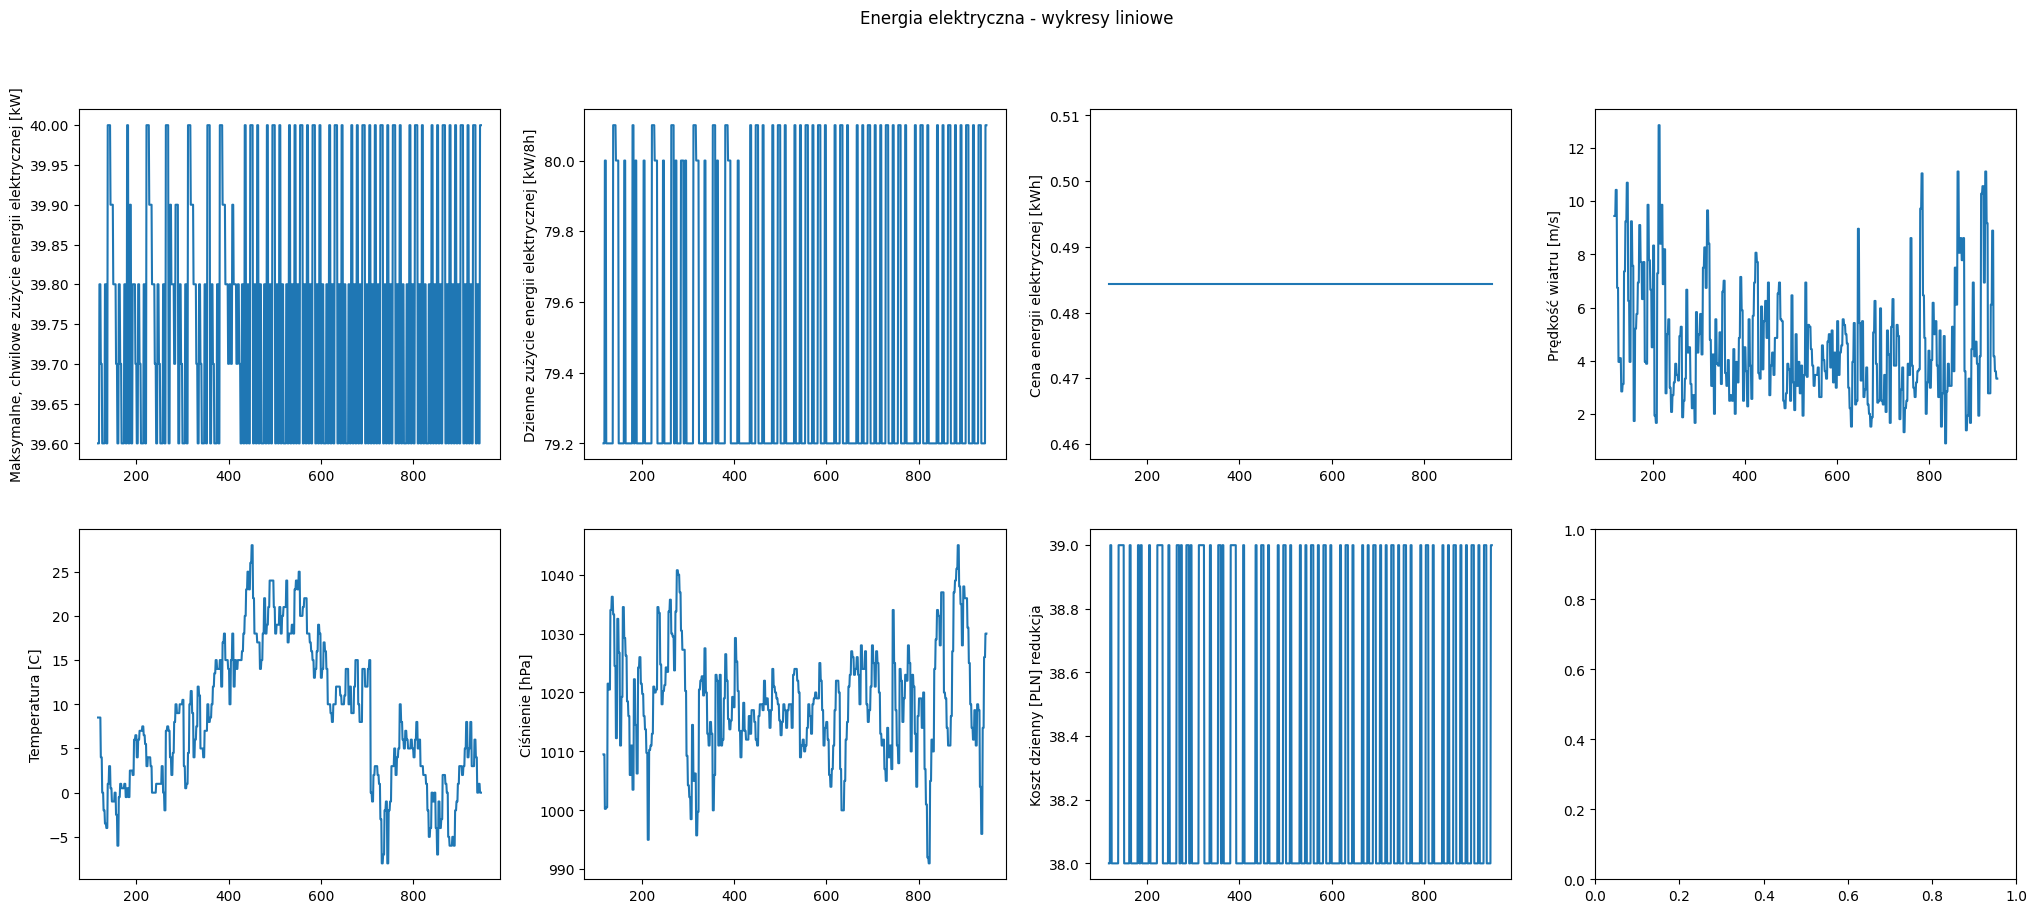

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
fig.suptitle('Energia elektryczna - wykresy liniowe')

i = 0
j = 0
var_names = list(data_electricity.columns[:7])
for var in var_names:
    if i % 4 == 0 and i != 0:
        i = 0
        j = 1
    sns.lineplot(ax=axes[j, i], data=data_electricity[var])
    i += 1 

Na podstawie powyższych operacji można stwierdzić, że cena energii elektrycznej w czasie przeprowadzonych testów była stała, a zróżnicowane warunki pogodowe najprawdopodobniej nie miały znaczącego wpływu na zużycie i dzienne koszty.

**Rozkład wartości - energia elektryczna**

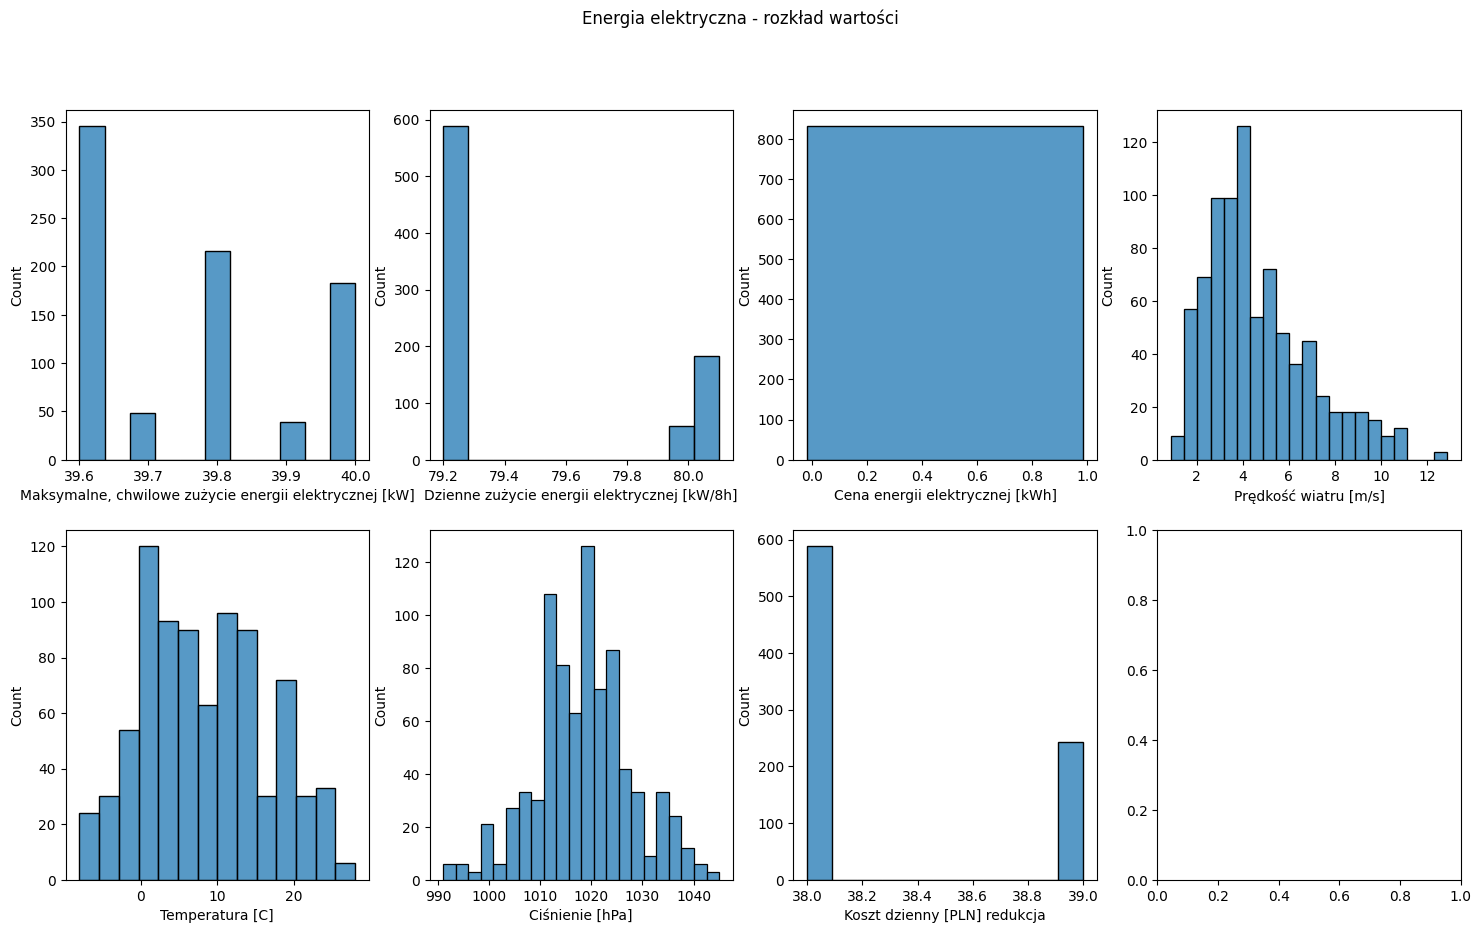

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Energia elektryczna - rozkład wartości')

i = 0
j = 0
var_names = list(data_electricity.columns[:7])
for var in var_names:
    if i % 4 == 0 and i != 0:
        i = 0
        j = 1
    sns.histplot(ax=axes[j, i], data=data_electricity[var])
    i += 1 

Wygenerowane histogramy dla poszczególnych zmiennych numerycznych potwierdzają, że cena energii elektrycznej przyjmuje wartość stałą przez cały okres przeprowadzania testów dźwignicy. Pozostałe zmienne związane ze zużyciem prądu i dziennym kosztem posiadają jedynie kilka unikalnych etykiet. W przypadku prędkości wiatru można zaobserwować prawoskośność rozkładu i przypuszczać, że mogą wystąpić wartości odstające w obrębie tej zmiennej. Rozkłady temperatury i ciśnienia są zbliżone do rozkładu normalnego.

**Sprawdzenie występowania wartości odstających i ekstremalnych - energia elektryczna**

In [ ]:
new_id = list(range(831))
data_electricity.set_index(pd.Index(new_id), inplace=True)

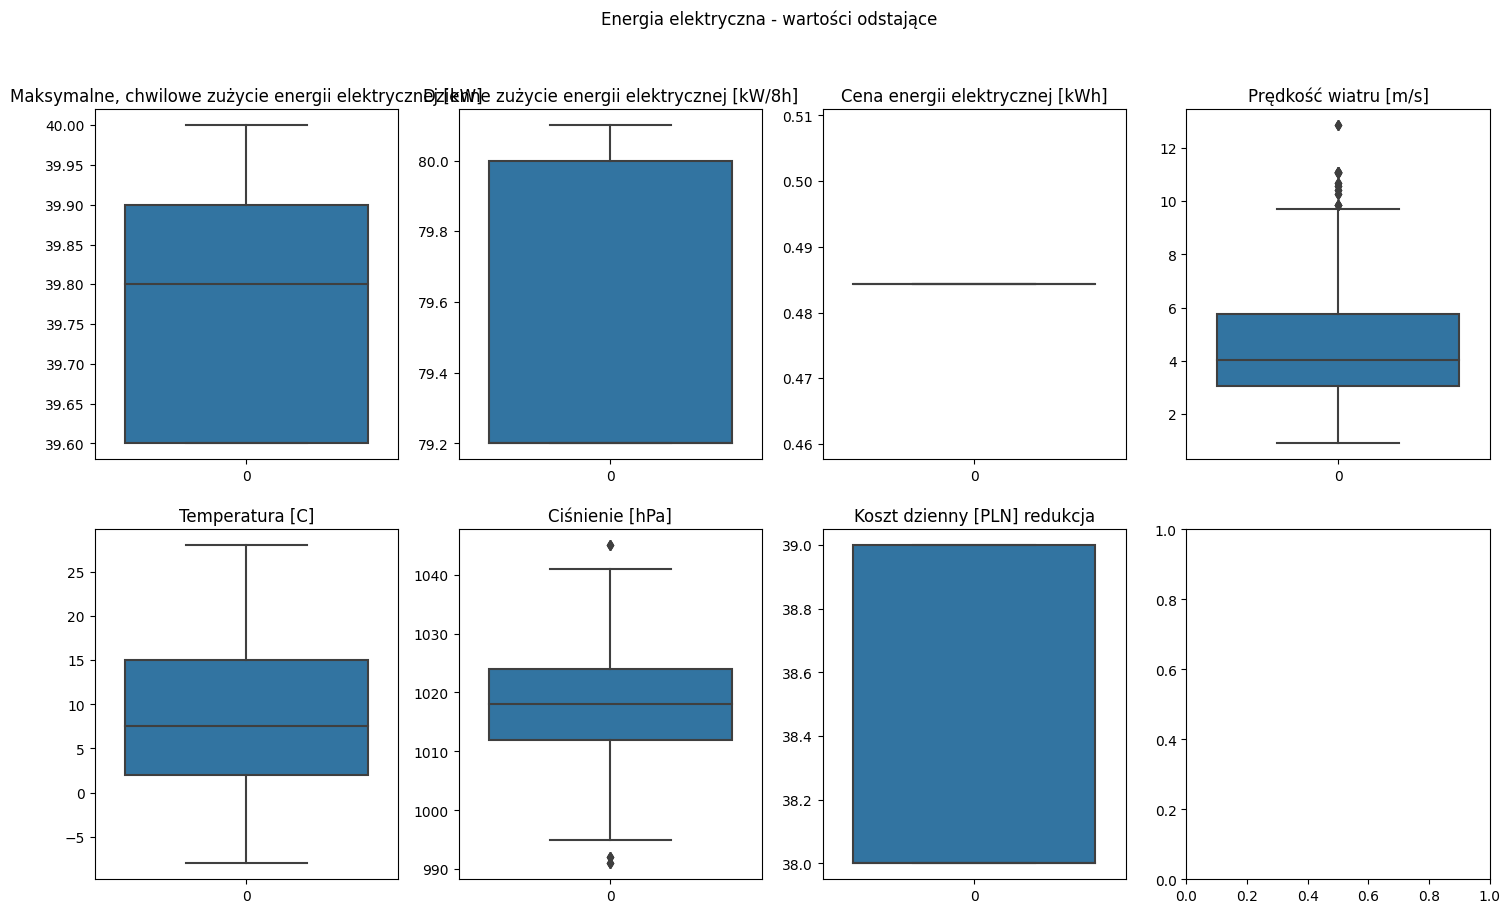

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Energia elektryczna - wartości odstające')

i = 0
j = 0
var_names = list(data_electricity.columns[:7])
for var in var_names:
    if i % 4 == 0 and i != 0:
        i = 0
        j = 1
    sns.boxplot(ax=axes[j, i], data=data_electricity[var])
    axes[j, i].set_title(var)
    i += 1 

In [ ]:
low_range_w = data_electricity['Prędkość wiatru [m/s]'].mean() - 3*(data_electricity['Prędkość wiatru [m/s]'].std())
top_range_w = data_electricity['Prędkość wiatru [m/s]'].mean() + 3*(data_electricity['Prędkość wiatru [m/s]'].std())
low_range_p = data_electricity['Ciśnienie [hPa]'].mean() - 3*(data_electricity['Ciśnienie [hPa]'].std())
top_range_p = data_electricity['Ciśnienie [hPa]'].mean() + 3*(data_electricity['Ciśnienie [hPa]'].std())
print(f"Dolny zakres prędkości wiatru: {low_range_w}\tciśnienia: {low_range_p}")
print(f"Górny zakres prędkości wiatru: {top_range_w}\tciśnienia: {top_range_p}")

Dolny zakres prędkości wiatru: -2.1053555598156795	ciśnienia: 990.0016445962021
Górny zakres prędkości wiatru: 11.450048700609903	ciśnienia: 1046.7077416853863


Analizując powyższe wykresy ramka-wąsy, można zaobserwować, że jedynie dla zmiennej *Prędkość wiatru [m/s]* i *Ciśnienie [hPa]* występują niepokojące wartości. Na podstawie reguły 3sigma stwierdzono, że w przypadku ciśnienia są to jedynie wartości odstające, a w przypadku prędkości wiatru - wartości odstające, poza jedną wartością ekstremalną. Z uwagi na możliwość występowania anomalii pogodowych wartość ektremalna, tak jak wszystkie wartości odstające, również nie została usunięta z podzbioru.  

**Wygenerowanie macierzy korelacji - energia elektryczna**

<Axes: >

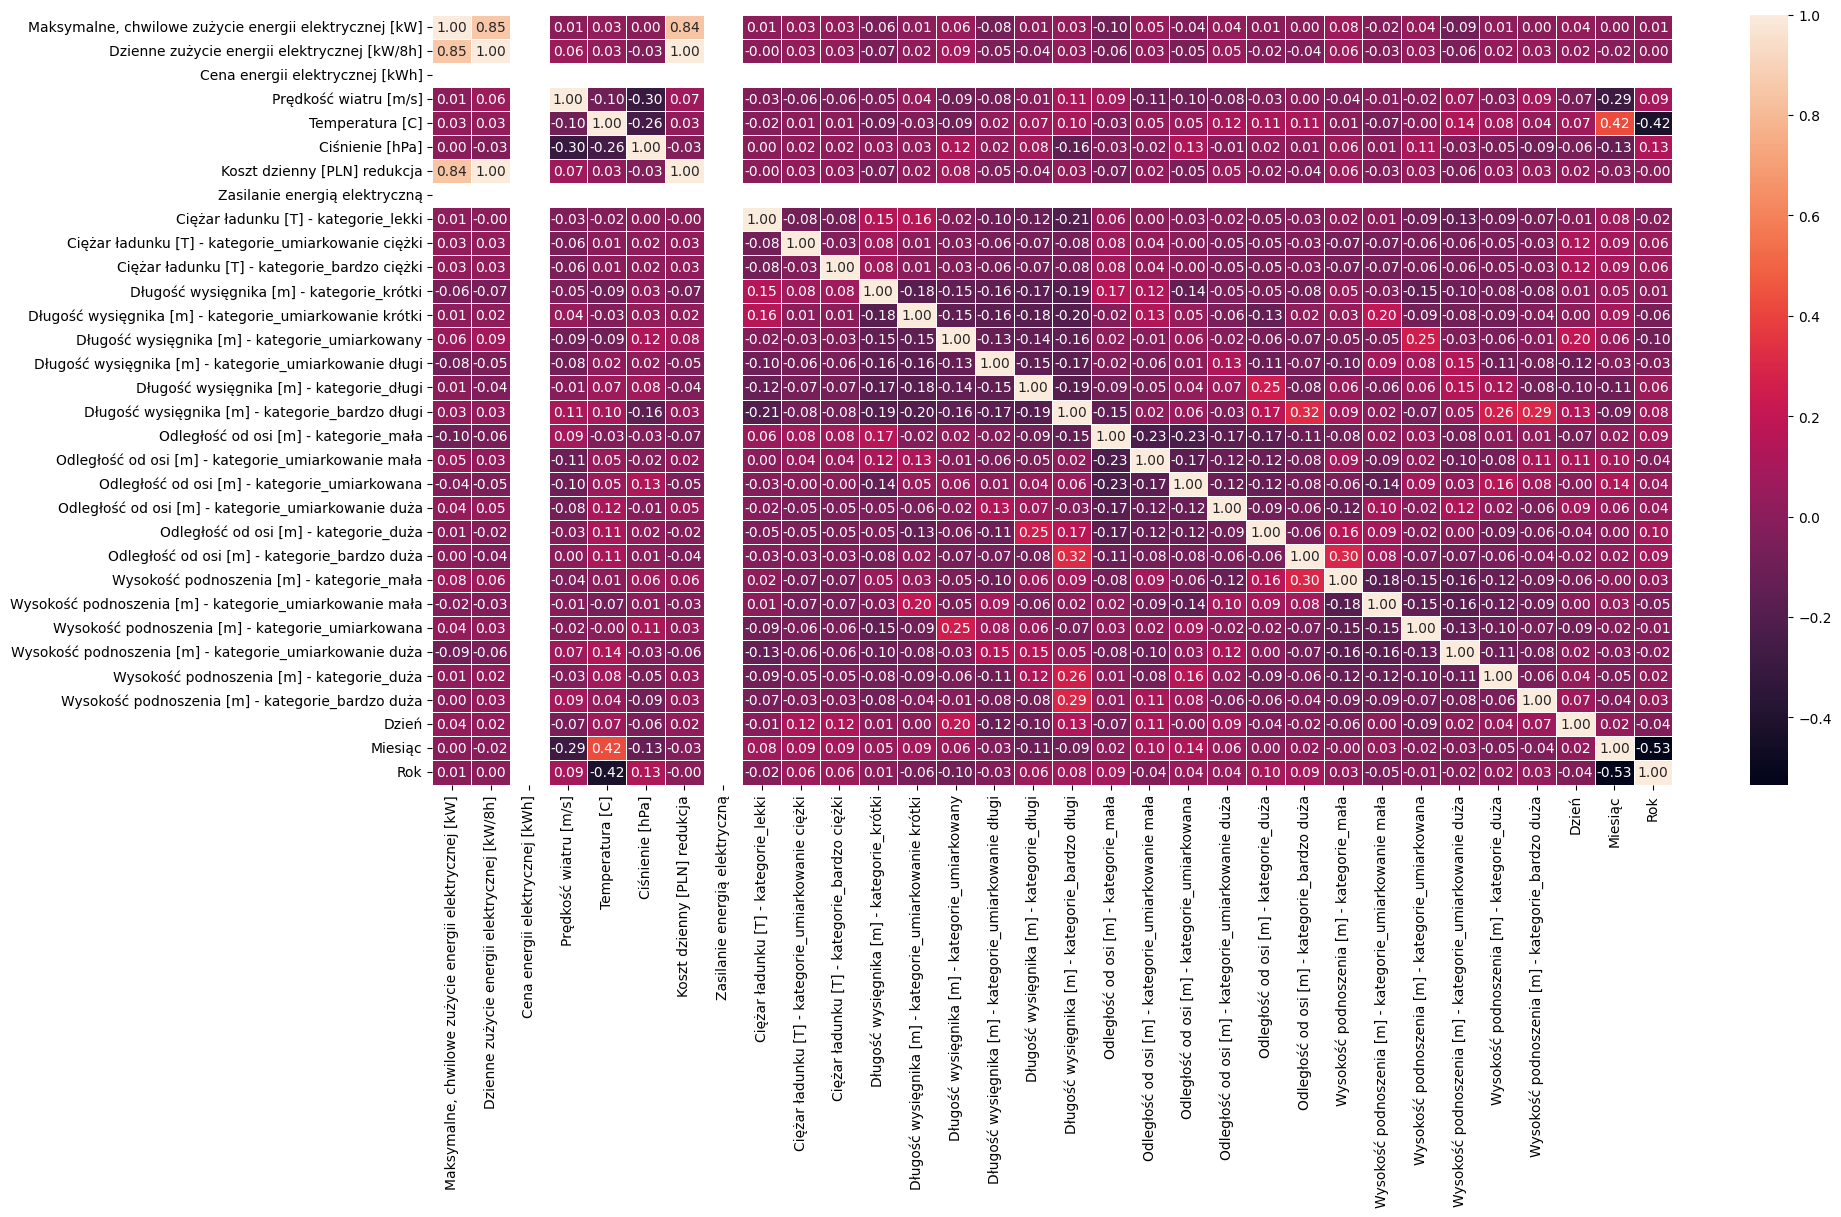

In [ ]:
corr = data_electricity.corr(numeric_only=False)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', ax=ax)

**Sprawdzenie relacji między najbardziej skorelowanymi zmiennymi - energia elektryczna**

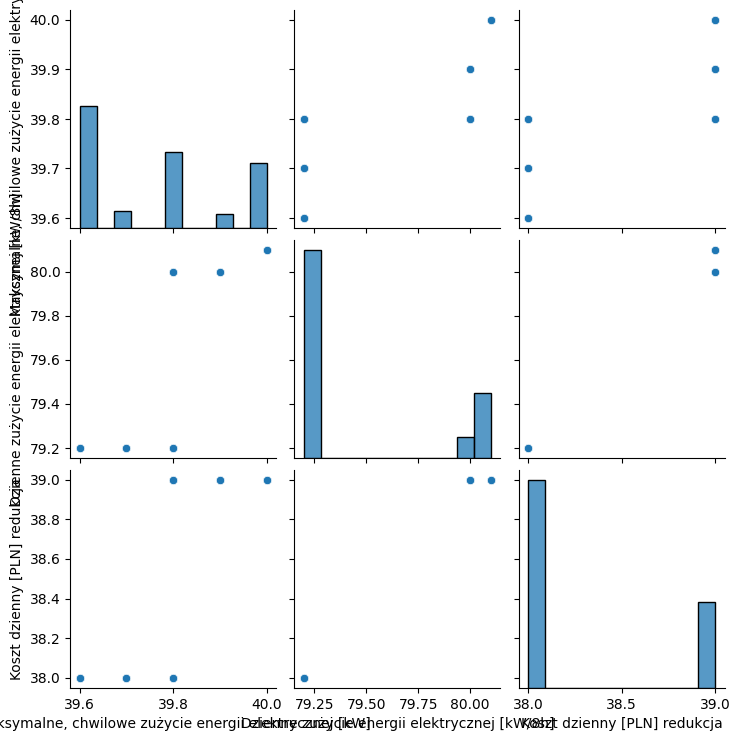

In [ ]:
var_names = ['Maksymalne, chwilowe zużycie energii elektrycznej [kW]', 'Dzienne zużycie energii elektrycznej [kW/8h]', 'Koszt dzienny [PLN] redukcja']
sns.pairplot(data_electricity[var_names])

Na podstawie zastosowanych metod EDA trudno określić, które zmienne powinny zostać wykorzystane w modelu, w związku z czym nie ma podstawy, która umożliwiłaby odpowiedni wybór. W zbiorze występuje wiele zmiennych, które nie byłyby reprezentatywne dla modelu jak np. stała cena energii elektrycznej, stąd kolejne etapy zostały przeprowadzone jedynie dla podzbioru związanego z paliwem, mimo znacznej dysproporcji w liczebności obserwacji między podzbiorami.

**Zastąpienie braków danych - Diesel**

<Axes: ylabel='Cena hurtowa ON 1000l [PLN]'>

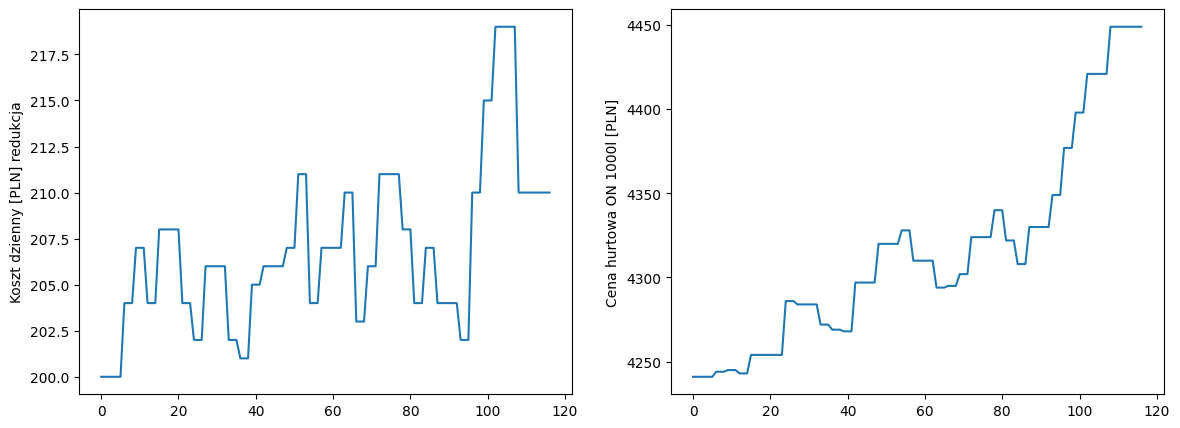

In [ ]:
data_diesel['Koszt dzienny [PLN] redukcja'] = data_diesel['Koszt dzienny [PLN] redukcja'].fillna(method='bfill')
data_diesel['Cena hurtowa ON 1000l [PLN]'] = data_diesel['Cena hurtowa ON 1000l [PLN]'].fillna(method='bfill')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.lineplot(ax=axes[0], data=data_diesel['Koszt dzienny [PLN] redukcja'])
sns.lineplot(ax=axes[1], data=data_diesel['Cena hurtowa ON 1000l [PLN]'])

W pierwszym kroku pracy z podzbiorem dotyczącym paliwa, braki danych zostały uzupełnione przy pomocy metody backfill, która umożliwiła zastąpić wartości NaN ostatnią napotkaną wartością. Jeśli przypuszczenia o przyczynie wystąpienia braków danych wspomniane we wcześniejszym etapie okazałyby się słuszne, innym rozwiązaniem mogłoby być zastąpienie braków wartością średnią, obliczoną z dwóch najbliższych niepustych wartości. 



**Statystyki opisowe, wizualizacja danych - Diesel**

In [ ]:
data_diesel.describe()

,"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],Prędkość wiatru [m/s],Temperatura [C],Ciśnienie [hPa],Koszt dzienny [PLN] redukcja,Zasilanie energią elektryczną,Ciężar ładunku [T] - kategorie_lekki,Ciężar ładunku [T] - kategorie_umiarkowanie ciężki,...,Odległość od osi [m] - kategorie_bardzo duża,Wysokość podnoszenia [m] - kategorie_mała,Wysokość podnoszenia [m] - kategorie_umiarkowanie mała,Wysokość podnoszenia [m] - kategorie_umiarkowana,Wysokość podnoszenia [m] - kategorie_umiarkowanie duża,Wysokość podnoszenia [m] - kategorie_duża,Wysokość podnoszenia [m] - kategorie_bardzo duża,Dzień,Miesiąc,Rok
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.0,...,117.0,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.0
mean,14.997436,47.958974,4315.461538,3.210769,4.333333,1012.326923,206.871795,0.0,0.128205,0.0,...,0.0,0.273504,0.213675,0.170940,0.085470,0.025641,0.0,15.871795,11.512821,2019.0
std,0.114817,0.749040,59.667114,1.257321,3.239539,9.145051,4.387558,0.0,0.335756,0.0,...,0.0,0.447675,0.411663,0.378076,0.280782,0.158742,0.0,8.501053,0.501985,0.0
min,14.800000,46.400000,4241.000000,1.390000,-3.000000,992.500000,200.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,11.000000,2019.0
25%,14.900000,47.200000,4269.000000,2.290000,2.500000,1005.000000,204.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.000000,11.000000,2019.0
50%,15.000000,48.000000,4308.000000,2.920000,4.750000,1012.750000,206.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,16.000000,12.000000,2019.0
75%,15.100000,48.800000,4330.000000,4.170000,6.750000,1020.000000,210.000000,0.0,0.000000,0.0,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,23.000000,12.000000,2019.0
max,15.200000,49.600000,4449.000000,6.880000,10.250000,1027.750000,219.000000,0.0,1.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,31.000000,12.000000,2019.0


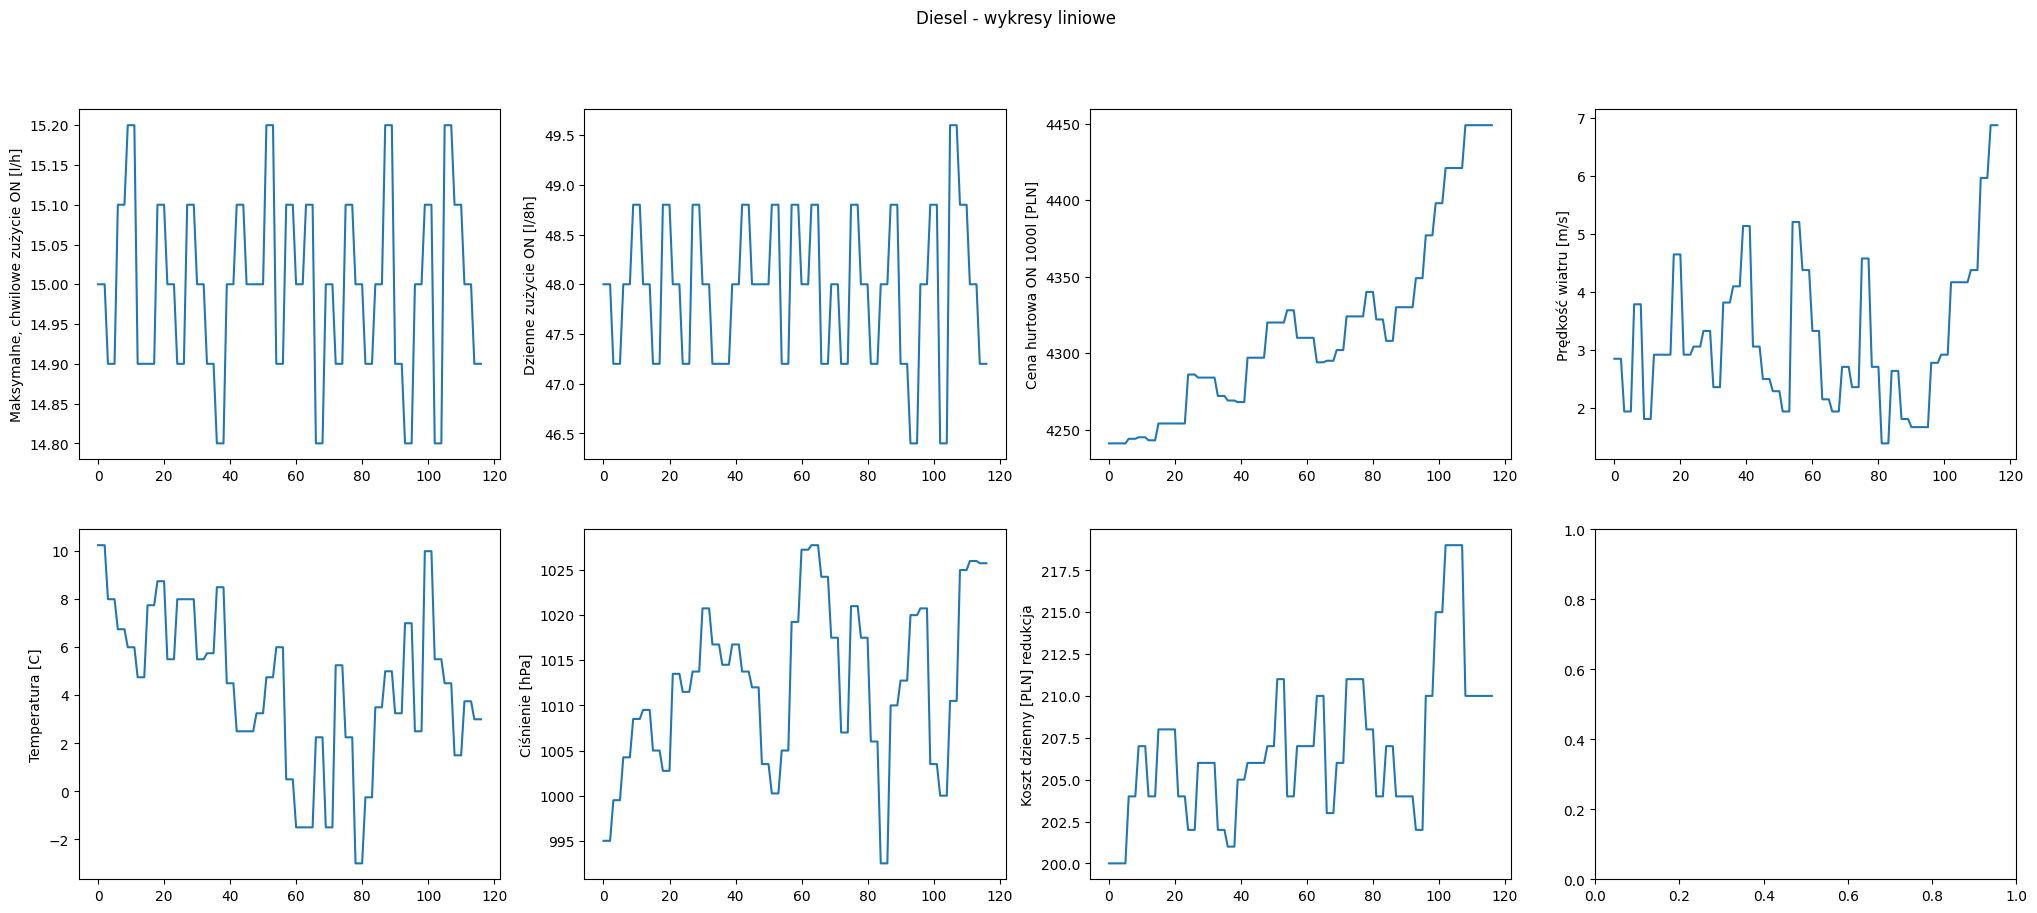

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(25, 10))
fig.suptitle('Diesel - wykresy liniowe')

i = 0
j = 0
var_names = list(data_diesel.columns[:7])
for var in var_names:
    if i % 4 == 0 and i != 0:
        i = 0
        j = 1
    sns.lineplot(ax=axes[j, i], data=data_diesel[var])
    i += 1 

Analizując powyższe wykresy można zauważyć, że wraz ze wzrostem dziennego zużycia i ceny hurtowej rosły dzienne koszty pracy dźwignicy, do czego mogły przyczynić się również warunki pogodowe - w szczególności odnotowany wzrost prędkości wiatru.

**Rozkład wartości - Diesel**

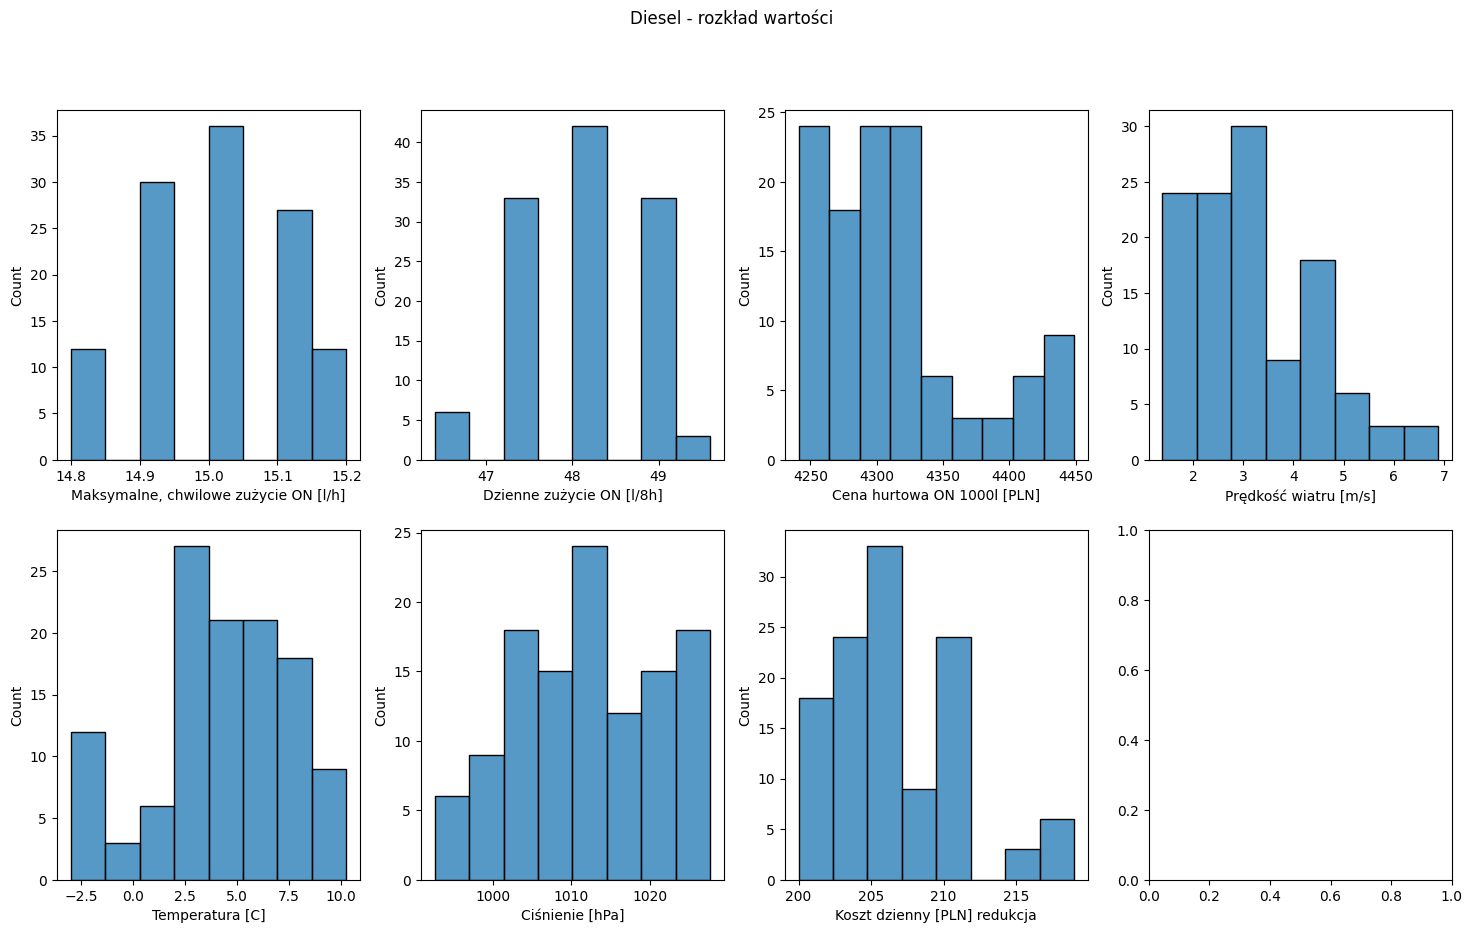

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Diesel - rozkład wartości')

i = 0
j = 0
var_names = list(data_diesel.columns[:7])
for var in var_names:
    if i % 4 == 0 and i != 0:
        i = 0
        j = 1
    sns.histplot(ax=axes[j, i], data=data_diesel[var])
    i += 1 

Powyższe wykresy prezentują rozkład wartości dla poszczególnych zmiennych numerycznych w podzbiorze Diesel. Na szczególną uwagę zasługuje rozkład wartości w przypadku ceny hurtowej, gdzie występuje wiele obserwacji posiadających niższą cenę oraz mniej liczna grupa obserwacji z wyższą ceną, związaną z podwyżką w przypadku końcowych testów i ogólnym rosnącym trendem cen. 

**Sprawdzenie wartości odstających - Diesel**

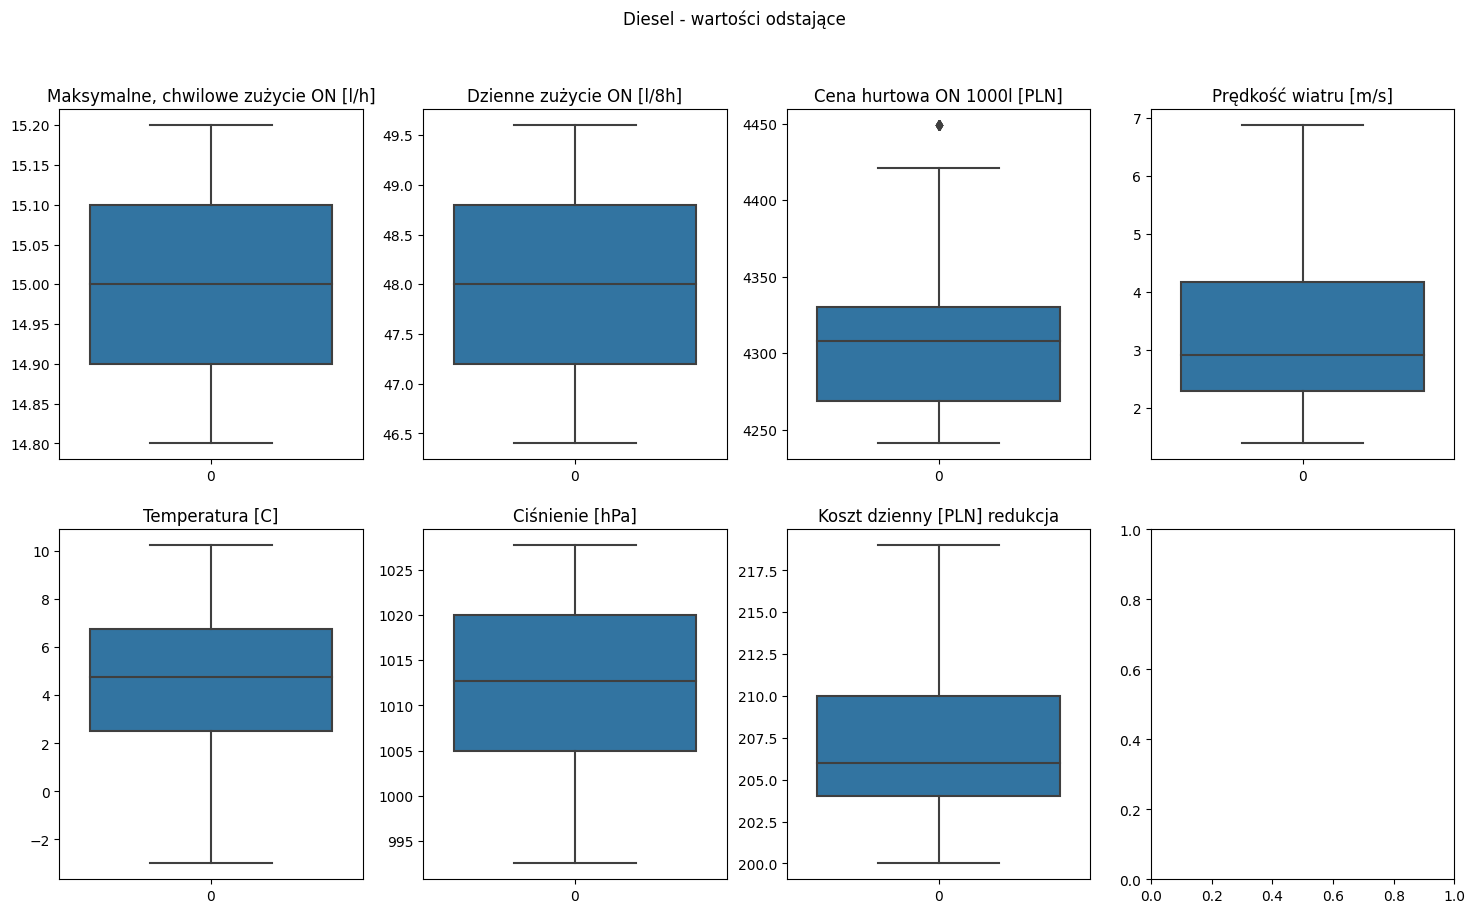

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Diesel - wartości odstające')

i = 0
j = 0
var_names = list(data_diesel.columns[:7])
for var in var_names:
    if i % 4 == 0 and i != 0:
        i = 0
        j = 1
    sns.boxplot(ax=axes[j, i], data=data_diesel[var])
    axes[j, i].set_title(var)
    i += 1 

In [ ]:
low_range = data_diesel['Cena hurtowa ON 1000l [PLN]'].mean() - 3*(data_diesel['Cena hurtowa ON 1000l [PLN]'].std())
top_range = data_diesel['Cena hurtowa ON 1000l [PLN]'].mean() + 3*(data_diesel['Cena hurtowa ON 1000l [PLN]'].std())
print(f"Dolny zakres: {low_range}")
print(f"Górny zakres: {top_range}")

Dolny zakres: 4136.460197388068
Górny zakres: 4494.462879535008


Wyświetlenie wykresów pudełkowych dla kolejnych zmiennych pozwoliło stwierdzić, że jedynie w przypadku zmiennej *Cena hurtowa ON 1000l [PLN]* zaobserwowano niepokojącą wartość. Obserwacja okazała się jednak wartością odstającą, więc nie było potrzeby jej usuwania.

**Macierz korelacji - Diesel**

<Axes: >

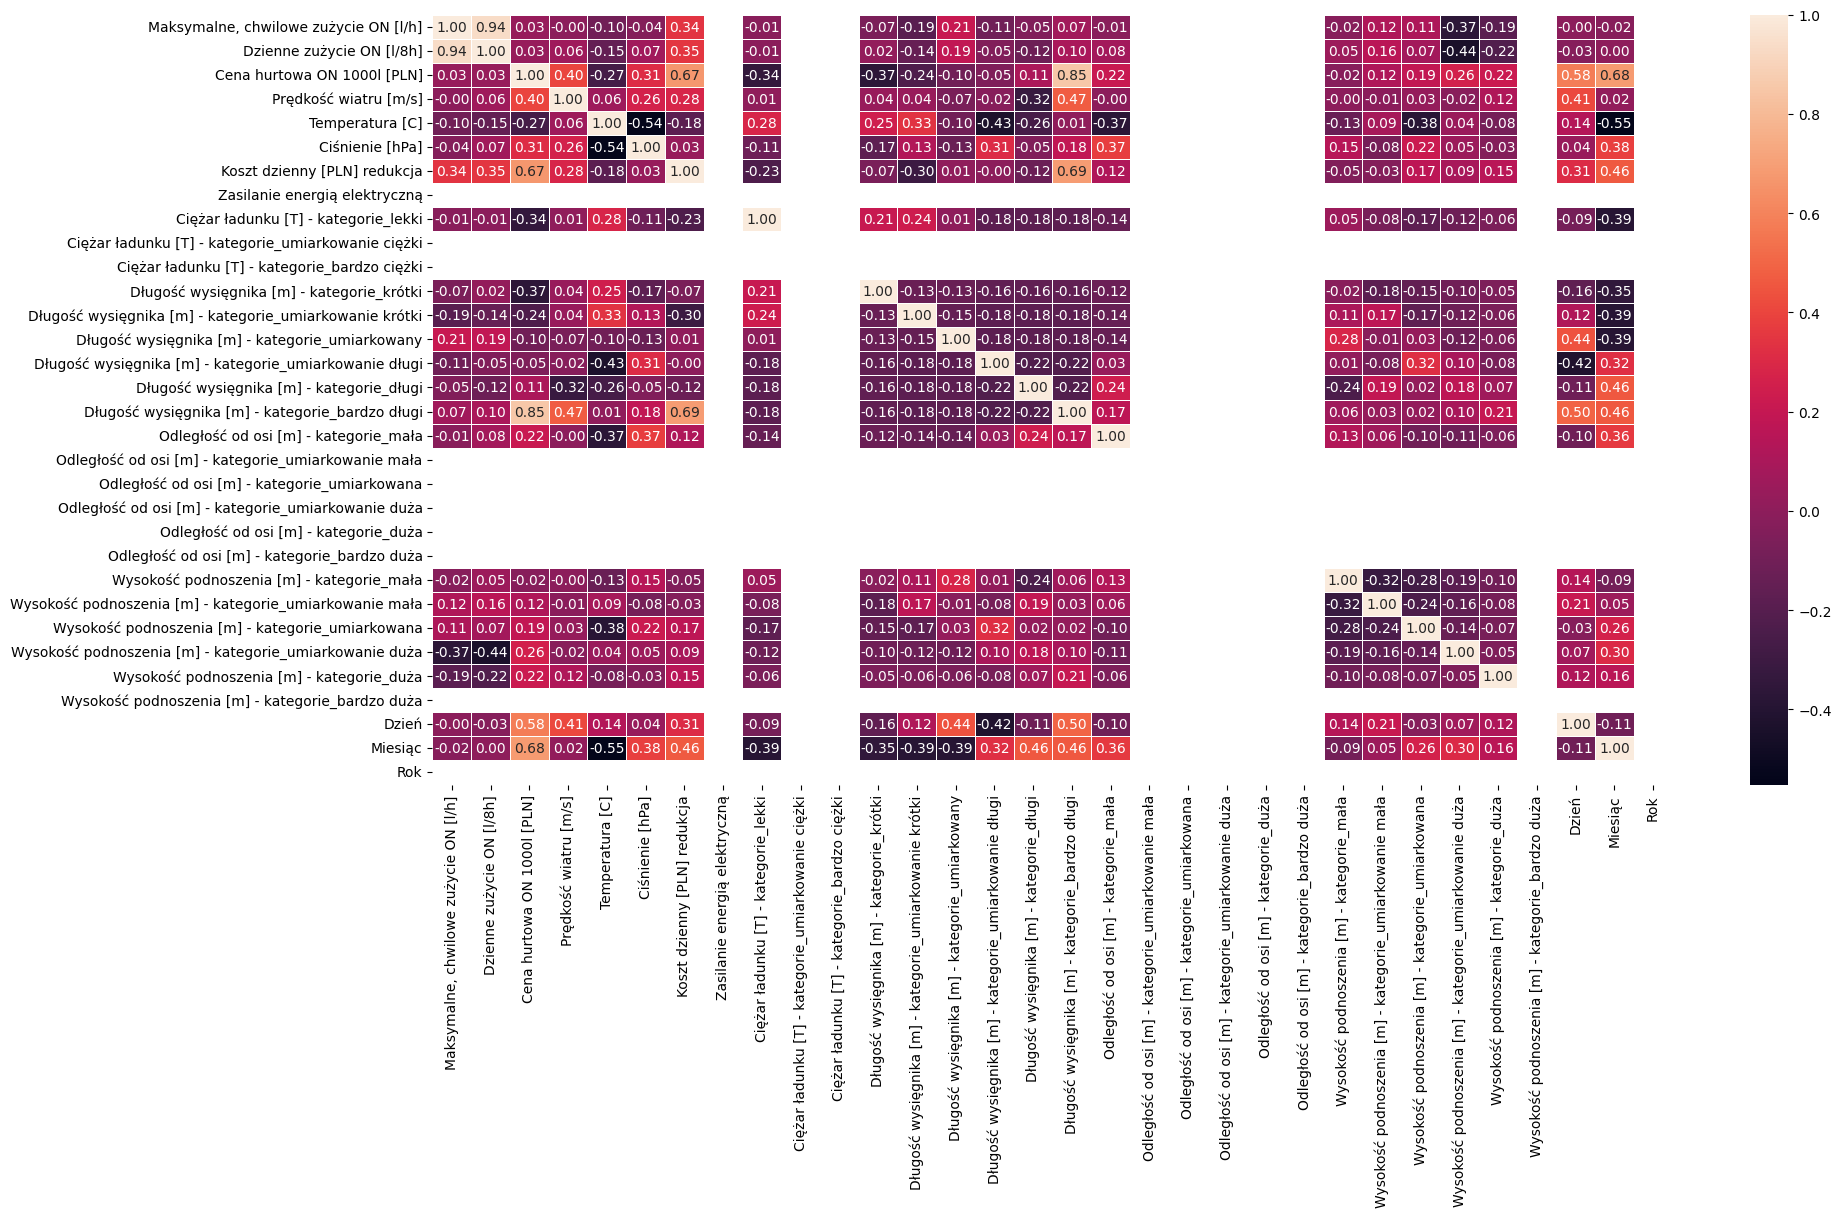

In [ ]:
corr = data_diesel.corr(numeric_only=False)
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f', ax=ax)

**Sprawdzenie relacji między najbardziej skorelowanymi zmiennymi - Diesel**

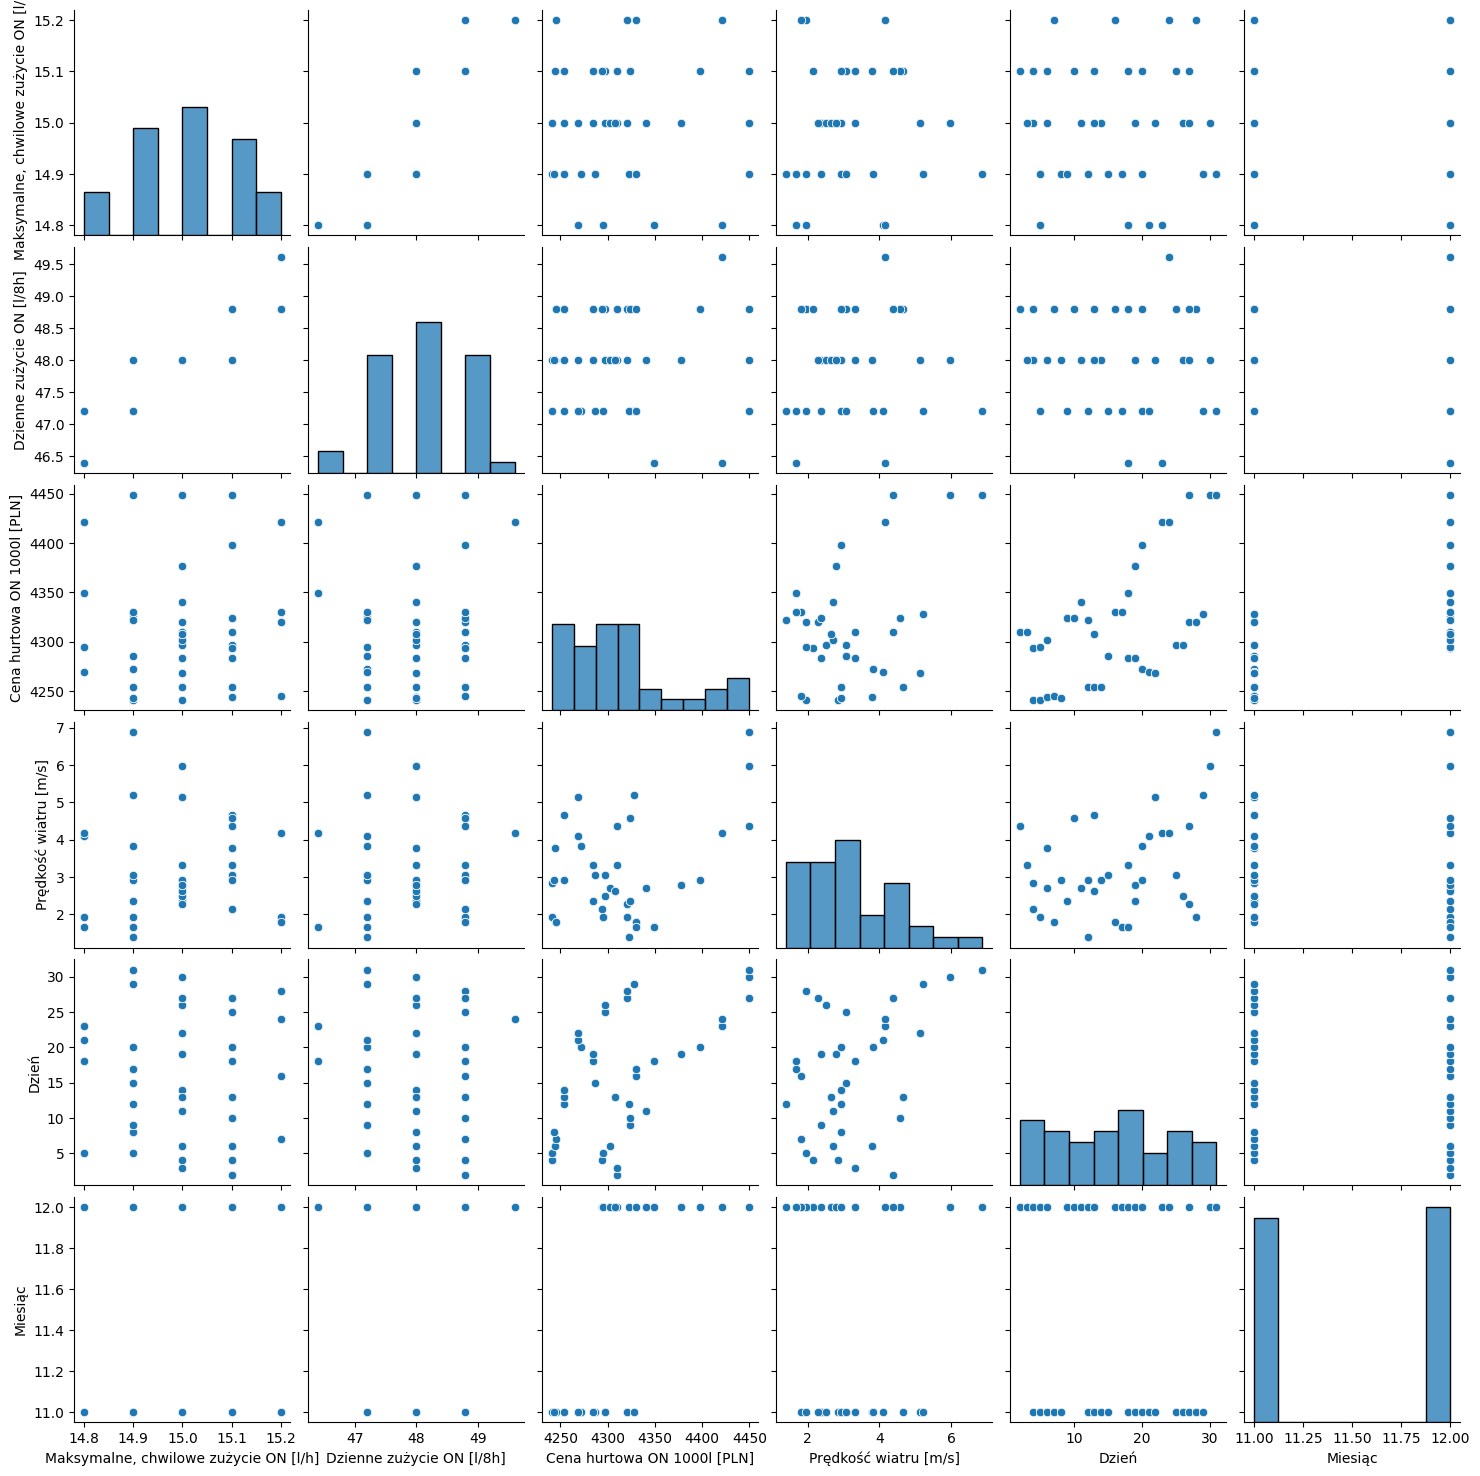

In [ ]:
var_names = ['Maksymalne, chwilowe zużycie ON [l/h]', 'Dzienne zużycie ON [l/8h]', 'Cena hurtowa ON 1000l [PLN]', 
        'Prędkość wiatru [m/s]', 'Dzień', 'Miesiąc']
sns.pairplot(data_diesel[var_names])

Otrzymane rezultaty w wyniku zastosowania metod EDA pozwoliły wybrać 9 zmiennych o największej wartości korelacji, które na podstawie powyższej analizy, wydają się mieć największe znaczenie, w związku z czym zostaną wykorzystane do modelu przewidywania dziennych kosztów dla układu zasilanego paliwem.

**Standaryzacja zmiennych numerycznych, które zostaną wykorzystane w modelu**

In [ ]:
var_names = ['Maksymalne, chwilowe zużycie ON [l/h]', 'Dzienne zużycie ON [l/8h]',	'Cena hurtowa ON 1000l [PLN]', 
        'Prędkość wiatru [m/s]', 'Dzień', 'Miesiąc', 'Koszt dzienny [PLN] redukcja']

scaler = StandardScaler()
data_diesel[var_names] = scaler.fit_transform(data_diesel[var_names])

Z uwagi na różny zakres wartości oraz po to, aby jedne zmienne nie przewyższały znacząco drugich, została wykonana standaryzacja zmiennych numerycznych.

**Wybór zmiennych do modelu i utworzenie zmiennej docelowej**

In [ ]:
var_names = ['Maksymalne, chwilowe zużycie ON [l/h]', 'Dzienne zużycie ON [l/8h]',	'Cena hurtowa ON 1000l [PLN]', 
        'Prędkość wiatru [m/s]', 'Ciężar ładunku [T] - kategorie_lekki', 'Długość wysięgnika [m] - kategorie_umiarkowanie krótki', 
        'Długość wysięgnika [m] - kategorie_bardzo długi', 'Dzień', 'Miesiąc', 'Koszt dzienny [PLN] redukcja']

X = data_diesel[var_names[:9]]
y = data_diesel[var_names[9]]
X

,"Maksymalne, chwilowe zużycie ON [l/h]",Dzienne zużycie ON [l/8h],Cena hurtowa ON 1000l [PLN],Prędkość wiatru [m/s],Ciężar ładunku [T] - kategorie_lekki,Długość wysięgnika [m] - kategorie_umiarkowanie krótki,Długość wysięgnika [m] - kategorie_bardzo długi,Dzień,Miesiąc
0,0.022428,0.055007,-1.253317,-0.288169,0,0,0,-1.402515,-1.025978
1,0.022428,0.055007,-1.253317,-0.288169,0,0,0,-1.402515,-1.025978
2,0.022428,0.055007,-1.253317,-0.288169,1,0,0,-1.402515,-1.025978
3,-0.852266,-1.017621,-1.253317,-1.015043,0,0,0,-1.284377,-1.025978
4,-0.852266,-1.017621,-1.253317,-1.015043,0,0,0,-1.284377,-1.025978
...,...,...,...,...,...,...,...,...,...
112,0.022428,0.055007,2.247684,2.203970,0,0,1,1.669084,0.974679
113,0.022428,0.055007,2.247684,2.203970,0,0,1,1.669084,0.974679
114,-0.852266,-1.017621,2.247684,2.930844,0,0,1,1.787222,0.974679
115,-0.852266,-1.017621,2.247684,2.930844,0,0,1,1.787222,0.974679


**Podział zbioru na zbiór treningowy i testowy**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03, random_state = 0)
X_train.shape, X_test.shape

((113, 9), (4, 9))

Wykonano podział zbioru na zbiór treningowy, do którego trafiło 113 obserwacji, a także zbiór testowy, w którym znalazły się 4 obserwacje. Niewielka liczbność zbioru testowego została uwarunkowana małolicznym podzbiorem danych odnoszących się do paliwa.

## **PODSUMOWANIE**

Analizując zarówno cały zestaw jak i wykonane podzbiory, można stwierdzić, iż zasilanie układu prądem okazało się znacznie tańszym rozwiązaniem, w porównaniu do zasilania paliwem. Wykorzystanie zaproponowanych metod FE i EDA nie pozwoliło ocenić, które ze zmiennych będą istotne dla modelu w przypadku pierwszego podzbioru (energia elektryczna), w związku z czym zaprzestano wykonania dalszych kroków dla tego podzbioru. Na podstawie macierzy korelacji, wygenerowanej dla drugiego podzbioru, wybrano 9 najbardziej skorelowanych zmiennych, które przypuszczalnie mogłyby najlepiej predykować dzienne koszty poniesione w wyniku pracy dźwignicy zasilanej Dieselem. W ten sposób utworzony zestaw zmiennych podzielono na zbiór treningowy i testowy, na czym zakończono proces przygotowywania danych do modelu.